c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error: 235.67479391391598
R2 Score: nan


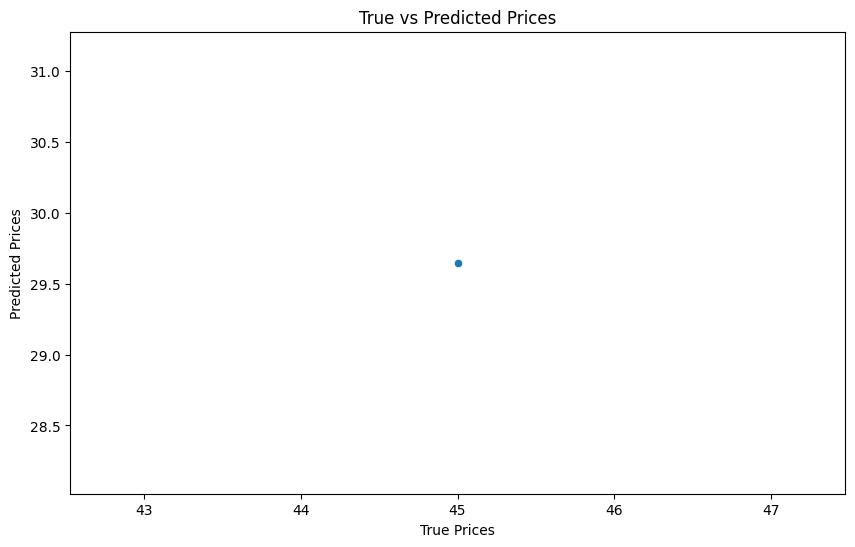

Predicted Retail Price for the New Product: $27.32


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (replace with your actual dataset)
data = {
    'product_name': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    'brand': ['Brand1', 'Brand2', 'Brand1', 'Brand3', 'Brand2'],
    'category': ['Category1', 'Category2', 'Category1', 'Category3', 'Category2'],
    'weight': [500, 1500, 800, 1200, 1000],  # in grams
    'dimensions': [30, 50, 35, 45, 40],  # in cm (length)
    'sales_volume': [1500, 1200, 1800, 900, 1300],  # units sold
    'retail_price': [20, 45, 25, 40, 30]  # target variable (price in USD)
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Encode categorical features (brand, category) into numerical values
df['brand'] = df['brand'].astype('category').cat.codes
df['category'] = df['category'].astype('category').cat.codes

# Features (independent variables)
X = df[['brand', 'category', 'weight', 'dimensions', 'sales_volume']]

# Target variable (dependent variable)
y = df['retail_price']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Plot the true vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('True vs Predicted Prices')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Example: Predict the retail price of a new product
new_product = pd.DataFrame({
    'brand': [1],  # Example: Brand2 encoded as 1
    'category': [0],  # Example: Category1 encoded as 0
    'weight': [1000],  # in grams
    'dimensions': [40],  # in cm
    'sales_volume': [1400]  # units sold
})

predicted_price = model.predict(new_product)
print(f'Predicted Retail Price for the New Product: ${predicted_price[0]:.2f}')


In [8]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data=pd.read_csv("C:/Users/Sadneya/Downloads/sales.csv")

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


In [5]:
# Convert the data into a DataFrame
df = pd.DataFrame(data)

In [6]:
# Step 1: Identify Target and Features
target_column = 'Sales'  # Replace with the actual column for retail price if different
X = df.drop(columns=[target_column])
y = df[target_column]

In [7]:
# Step 2: Handle Categorical Columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [9]:
# Label Encoding for High Cardinality Columns
label_encoder = LabelEncoder()
high_cardinality_cols = ['State', 'Market', 'Product', 'Product Type', 'Type']
for col in high_cardinality_cols:
    if col in X.columns:
        X[col] = label_encoder.fit_transform(X[col])

In [10]:
# One-Hot Encoding for Low Cardinality Columns
low_cardinality_cols = ['Market Size']
X = pd.get_dummies(X, columns=low_cardinality_cols, drop_first=True)

In [11]:
# Step 3: Handle Date Column
if 'Date' in X.columns:
    X['Date'] = pd.to_datetime(X['Date'])
    X['Year'] = X['Date'].dt.year
    X['Month'] = X['Date'].dt.month
    X['Day'] = X['Date'].dt.day
    X.drop(columns=['Date'], inplace=True)

C:\Users\Sadneya\AppData\Local\Temp\ipykernel_29560\2057657627.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['Date'] = pd.to_datetime(X['Date'])


In [12]:
# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 5: Feature Scaling (Optional for Tree-Based Models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Step 6: Train a Model
# Using Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Step 7: Predict on the Test Set
y_pred = model.predict(X_test)

In [16]:
# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 13.49
R-squared: 1.00


In [18]:
# Optional: Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

Feature Importances:
Margin                      0.918697
COGS                        0.061808
Total Expenses              0.010682
Marketing                   0.002663
Profit                      0.001748
Budget Sales                0.001522
Inventory                   0.000786
Year                        0.000384
Budget COGS                 0.000359
Month                       0.000346
Budget Margin               0.000259
Budget Profit               0.000186
Area Code                   0.000155
Product                     0.000113
State                       0.000101
ProductId                   0.000091
Product Type                0.000053
Market Size_Small Market    0.000022
Market                      0.000017
Type                        0.000007
Day                         0.000000
dtype: float64


In [25]:
# Save the Model (Optional)
import joblib
joblib.dump(model, 'retail_price_model.pkl')

['retail_price_model.pkl']

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Sample training data
# Replace this with your actual training data and features
X_train = pd.DataFrame({
    'Area Code': [120, 121, 122],
    'State': ['California', 'Texas', 'Florida'],
    'Market': ['North', 'South', 'West'],
    'Market Size': ['Major', 'Small', 'Medium'],
    'Profit': [6000, 4000, 5000],
    'Sales': [22000, 15000, 18000],
    'COGS': [20000, 10000, 12000],
    'Total Expenses': [4000, 2000, 3000],
    'Marketing': [1500, 1000, 1200],
    'Inventory': [1000, 500, 700],
    'Budget Profit': [6200, 4200, 5300],
    'Budget Sales': [24000, 16000, 19000],
})

# Example target variable (Sales)
y_train = X_train['Sales']

# Preprocessing (e.g., Label Encoding and Scaling)
label_encoder = LabelEncoder()
X_train['State'] = label_encoder.fit_transform(X_train['State'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Profit', 'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory', 'Budget Profit', 'Budget Sales']])

# Train the model
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# Save the model and scaler using joblib
joblib.dump(model, 'sales_prediction_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')


['label_encoder.joblib']